# LeNet 1 Mod

## Google Colab Stuff

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1meytppCXQ0WRmngIB5_ORuOWsusRHBch'}) # replace the id with id of file you want to access
downloaded.GetContentFile('handwritten.csv')  

#3. Read file as panda dataframe
import pandas as pd
data = pd.read_csv('handwritten.csv') 

In [0]:
!pip install -q keras
!pip install -q numpy
!pip install -q sklearn
!pip install -q matplotlib
!pip install -q pandas


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split

## Load the Data

In [5]:
# Get the data from the csv file
data = data.values
np.random.shuffle(data)

# Split the data into X, Y, and parition the values into the training and test splits
# Reshape X to be in the shape (N, 28, 28)
X, Y = data[:,1:], data[:,0]
# X = X.reshape(X.shape[0], 28, 28)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Train {} {}".format(X_train.shape, Y_train.shape))
print("Test {} {}".format(X_test.shape, Y_test.shape))

Train (297629, 784) (297629,)
Test (74408, 784) (74408,)


## Analyze the Data

In [6]:
classes = np.unique(Y_train)
n_classes = len(classes)
print('Total number of outputs : ', n_classes)
print('Output classes : ', classes)

Total number of outputs :  26
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


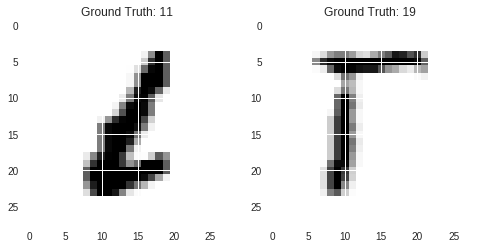

In [7]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(Y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(Y_test[0]))

plt.show()


## Data Preprocessing

In [8]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [9]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print("Train {}".format(X_train.shape))
print("Test {}".format(X_test.shape))

Train (297629, 28, 28, 1)
Test (74408, 28, 28, 1)


In [0]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Normalize and standardize the data
mean_image = np.mean(X_train, axis=0)
X_train = (X_train - mean_image) / 255
X_test = (X_test - mean_image) / 255

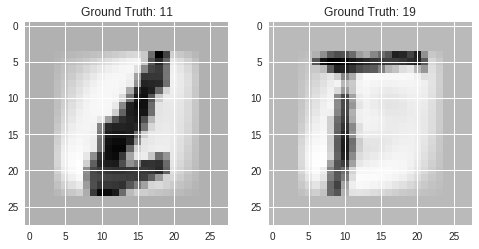

In [11]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(Y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(Y_test[0]))

plt.show()

In [12]:
Y_train_onehot = to_categorical(Y_train)
Y_test_onehot = to_categorical(Y_test)

print("Original Label: {}".format(Y_train[0]))
print("One Hot Label: {}".format(Y_train_onehot[0]))

Original Label: 11
One Hot Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [13]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train_onehot, test_size=0.2)

print("Train: {} {}".format(X_train.shape, Y_train.shape))
print("Valid: {} {}".format(X_valid.shape, Y_valid.shape))

Train: (238103, 28, 28, 1) (238103, 26)
Valid: (59526, 28, 28, 1) (59526, 26)


## Lenet 1 Model


In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 64
epochs = 20
num_classes = 26


### Input
The LeNet 1 model accepts a 28 x 28 input layer.

### Architecture
Conolutional Layer 1: Output should be 24 x 24 x 4

Activation: Your choice of activation function

Pooling Layer 1: Output should be 12 x 12 x 4

Convolution Layer 2: Output should be 8 x 8 x 12

Activation: Your choice of activation function

Pooling Layer 2: Output should be 4 x 4 x 12

Conolution Layer 3: Output should be 1 x 1 x 10

In [0]:
lenet1_model = Sequential()
# Convolutional Layer 1
lenet1_model.add(Conv2D(4, kernel_size=(5,5), activation="linear", 
                     input_shape=(28, 28, 1), padding="valid", data_format="channels_last"))
# Activiation Layer
lenet1_model.add(LeakyReLU(alpha=0.1))
# Pooling Layer 1
lenet1_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
# Convolution Layer 2
lenet1_model.add(Conv2D(12, kernel_size=(5,5), activation="linear", padding="valid"))
# Activation Layer
lenet1_model.add(LeakyReLU(alpha=0.1))
# Pooling Layer 2
lenet1_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
# Convolution Layer 3
lenet1_model.add(Conv2D(num_classes, kernel_size=(4,4), activation="linear", padding="valid"))
lenet1_model.add(Flatten())


In [21]:
lenet1_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adam(),
                     metrics=['accuracy'])
lenet1_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 24, 24, 4)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 12)          1212      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 12)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 12)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 26)          5018      
__________

In [22]:
print(X_train.shape)
print(Y_train.shape)
lenet1_train = lenet1_model.fit(X_train, 
                                Y_train, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(X_valid, Y_valid))

(238103, 28, 28, 1)
(238103, 26)
Train on 238103 samples, validate on 59526 samples
Epoch 1/20
201216/238103 [========================>.....] - ETA: 5s - loss: 9.6576 - acc: 0.0588

238103/238103 [==============================] - 38s 159us/step - loss: 9.6714 - acc: 0.0598 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 2/20
146048/238103 [=================>............] - ETA: 13s - loss: 9.7103 - acc: 0.0669

238103/238103 [==============================] - 38s 158us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 3/20
126400/238103 [==============>...............] - ETA: 16s - loss: 9.6956 - acc: 0.0664

238103/238103 [==============================] - 38s 159us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 4/20
117376/238103 [=============>................] - ETA: 18s - loss: 9.7070 - acc: 0.0672

238103/238103 [==============================] - 37s 155us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 5/20
122304/238103 [==============>...............] - ETA: 16s - loss: 9.7052 - acc: 0.0668

238103/238103 [==============================] - 36s 153us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 6/20
116288/238103 [=============>................] - ETA: 18s - loss: 9.6974 - acc: 0.0657

238103/238103 [==============================] - 38s 159us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 7/20
115456/238103 [=============>................] - ETA: 17s - loss: 9.7325 - acc: 0.0671

238103/238103 [==============================] - 37s 156us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 8/20
114240/238103 [=============>................] - ETA: 18s - loss: 9.7226 - acc: 0.0665

238103/238103 [==============================] - 38s 159us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 9/20
114816/238103 [=============>................] - ETA: 17s - loss: 9.6931 - acc: 0.0670

238103/238103 [==============================] - 37s 155us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 10/20
113728/238103 [=============>................] - ETA: 18s - loss: 9.7031 - acc: 0.0653

238103/238103 [==============================] - 38s 159us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 11/20
112512/238103 [=============>................] - ETA: 18s - loss: 9.6880 - acc: 0.0658

238103/238103 [==============================] - 37s 156us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 12/20
113344/238103 [=============>................] - ETA: 18s - loss: 9.7025 - acc: 0.0661

238103/238103 [==============================] - 38s 158us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 13/20
113728/238103 [=============>................] - ETA: 18s - loss: 9.6999 - acc: 0.0667

238103/238103 [==============================] - 37s 156us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 14/20
112512/238103 [=============>................] - ETA: 18s - loss: 9.7254 - acc: 0.0671

238103/238103 [==============================] - 38s 159us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 15/20
112640/238103 [=============>................] - ETA: 18s - loss: 9.7146 - acc: 0.0657

238103/238103 [==============================] - 37s 156us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 16/20
112576/238103 [=============>................] - ETA: 18s - loss: 9.6825 - acc: 0.0676

238103/238103 [==============================] - 38s 159us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 17/20
113280/238103 [=============>................] - ETA: 18s - loss: 9.7086 - acc: 0.0672

238103/238103 [==============================] - 37s 155us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 18/20
113856/238103 [=============>................] - ETA: 18s - loss: 9.6960 - acc: 0.0659

238103/238103 [==============================] - 38s 158us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 19/20
113408/238103 [=============>................] - ETA: 18s - loss: 9.7171 - acc: 0.0672

238103/238103 [==============================] - 37s 155us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669
Epoch 20/20
113984/238103 [=============>................] - ETA: 18s - loss: 9.7097 - acc: 0.0665

238103/238103 [==============================] - 38s 158us/step - loss: 9.7040 - acc: 0.0665 - val_loss: 9.7425 - val_acc: 0.0669


In [23]:
test_eval = lenet1_model.evaluate(X_test, Y_test_onehot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 9.701666349339853
Test accuracy: 0.06782872809375336


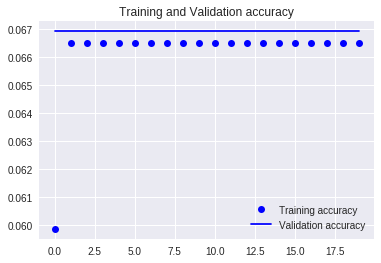

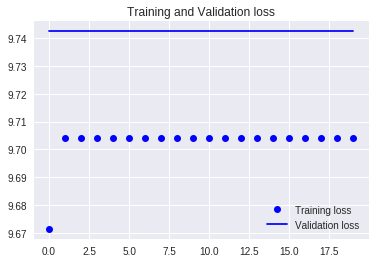

In [24]:
accuracy = lenet1_train.history['acc']
val_accuracy = lenet1_train.history['val_acc']
loss = lenet1_train.history['loss']
val_loss = lenet1_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

## LeNet 1 Mod Model

In [0]:
batch_size = 128
epochs = 20
num_classes = 26

In [0]:
lenet1_mod_model = Sequential()
# Convolutional Layer 1
lenet1_mod_model.add(Conv2D(32, 
                            kernel_size=(5,5), 
                            padding="same", 
                            activation="relu",
                            input_shape=(28, 28, 1), 
                            data_format="channels_last"))

# Pooling Layer 1
lenet1_mod_model.add(MaxPooling2D(pool_size=(2,2), 
                                  padding="same"))

# Convolution Layer 2
lenet1_mod_model.add(Conv2D(32, 
                            kernel_size=(5,5), 
                            activation="relu", 
                            padding="same"))

# Pooling Layer 2
lenet1_mod_model.add(MaxPooling2D(pool_size=(2,2), 
                                  padding="same"))

# Convolution Layer 3
lenet1_mod_model.add(Conv2D(32, 
                            kernel_size=(5,5), 
                            activation="linear", 
                            padding="same"))

lenet1_mod_model.add(Flatten())

lenet1_mod_model.add(Dense(128, 
                           activation="relu"))

lenet1_mod_model.add(Dense(num_classes, 
                           activation="softmax"))


In [0]:
lenet1_mod_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [28]:
lenet1_mod_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
__________

In [29]:
lenet1_mod_train = lenet1_mod_model.fit(X_train, Y_train, batch_size=batch_size,
                                epochs=epochs,verbose=1,validation_data=(X_valid, Y_valid))

Train on 238103 samples, validate on 59526 samples
Epoch 1/20
238103/238103 [==============================] - 37s 153us/step - loss: 0.1747 - acc: 0.9521 - val_loss: 0.0869 - val_acc: 0.9770
Epoch 2/20
 17024/238103 [=>............................] - ETA: 29s - loss: 0.0765 - acc: 0.9800

238103/238103 [==============================] - 35s 146us/step - loss: 0.0727 - acc: 0.9801 - val_loss: 0.0909 - val_acc: 0.9755
Epoch 3/20
103936/238103 [============>.................] - ETA: 17s - loss: 0.0585 - acc: 0.9834

238103/238103 [==============================] - 34s 141us/step - loss: 0.0578 - acc: 0.9839 - val_loss: 0.0727 - val_acc: 0.9806
Epoch 4/20
142208/238103 [================>.............] - ETA: 12s - loss: 0.0490 - acc: 0.9863

238103/238103 [==============================] - 34s 141us/step - loss: 0.0486 - acc: 0.9865 - val_loss: 0.0630 - val_acc: 0.9838
Epoch 5/20
166016/238103 [===================>..........] - ETA: 9s - loss: 0.0414 - acc: 0.9885

238103/238103 [==============================] - 33s 138us/step - loss: 0.0415 - acc: 0.9884 - val_loss: 0.0561 - val_acc: 0.9854
Epoch 6/20
170880/238103 [====================>.........] - ETA: 8s - loss: 0.0354 - acc: 0.9895

238103/238103 [==============================] - 33s 138us/step - loss: 0.0356 - acc: 0.9896 - val_loss: 0.0540 - val_acc: 0.9864
Epoch 7/20
173952/238103 [====================>.........] - ETA: 8s - loss: 0.0306 - acc: 0.9913

238103/238103 [==============================] - 33s 139us/step - loss: 0.0319 - acc: 0.9910 - val_loss: 0.0580 - val_acc: 0.9839
Epoch 8/20
175616/238103 [=====================>........] - ETA: 8s - loss: 0.0277 - acc: 0.9921

238103/238103 [==============================] - 33s 140us/step - loss: 0.0280 - acc: 0.9919 - val_loss: 0.0627 - val_acc: 0.9857
Epoch 9/20
175232/238103 [=====================>........] - ETA: 8s - loss: 0.0250 - acc: 0.9928

238103/238103 [==============================] - 33s 140us/step - loss: 0.0261 - acc: 0.9925 - val_loss: 0.0627 - val_acc: 0.9855
Epoch 10/20
179712/238103 [=====================>........] - ETA: 7s - loss: 0.0241 - acc: 0.9931

238103/238103 [==============================] - 33s 138us/step - loss: 0.0244 - acc: 0.9930 - val_loss: 0.0597 - val_acc: 0.9880
Epoch 11/20
177664/238103 [=====================>........] - ETA: 7s - loss: 0.0221 - acc: 0.9934

238103/238103 [==============================] - 33s 139us/step - loss: 0.0231 - acc: 0.9931 - val_loss: 0.0632 - val_acc: 0.9873
Epoch 12/20
183296/238103 [======================>.......] - ETA: 6s - loss: 0.0204 - acc: 0.9941

238103/238103 [==============================] - 32s 136us/step - loss: 0.0215 - acc: 0.9938 - val_loss: 0.0678 - val_acc: 0.9856
Epoch 13/20
182912/238103 [======================>.......] - ETA: 7s - loss: 0.0213 - acc: 0.9939

238103/238103 [==============================] - 33s 137us/step - loss: 0.0214 - acc: 0.9938 - val_loss: 0.0639 - val_acc: 0.9883
Epoch 14/20
184448/238103 [======================>.......] - ETA: 6s - loss: 0.0190 - acc: 0.9946

238103/238103 [==============================] - 33s 137us/step - loss: 0.0201 - acc: 0.9943 - val_loss: 0.0643 - val_acc: 0.9869
Epoch 15/20
187392/238103 [======================>.......] - ETA: 6s - loss: 0.0193 - acc: 0.9946

238103/238103 [==============================] - 32s 136us/step - loss: 0.0200 - acc: 0.9944 - val_loss: 0.0724 - val_acc: 0.9870
Epoch 16/20
186496/238103 [======================>.......] - ETA: 6s - loss: 0.0181 - acc: 0.9950

238103/238103 [==============================] - 33s 137us/step - loss: 0.0189 - acc: 0.9949 - val_loss: 0.0679 - val_acc: 0.9875
Epoch 17/20
186112/238103 [======================>.......] - ETA: 6s - loss: 0.0169 - acc: 0.9954

238103/238103 [==============================] - 32s 136us/step - loss: 0.0174 - acc: 0.9952 - val_loss: 0.0659 - val_acc: 0.9890
Epoch 18/20
189824/238103 [======================>.......] - ETA: 6s - loss: 0.0187 - acc: 0.9950

238103/238103 [==============================] - 32s 136us/step - loss: 0.0188 - acc: 0.9950 - val_loss: 0.0697 - val_acc: 0.9886
Epoch 19/20
187648/238103 [======================>.......] - ETA: 6s - loss: 0.0173 - acc: 0.9954

238103/238103 [==============================] - 33s 137us/step - loss: 0.0176 - acc: 0.9953 - val_loss: 0.0704 - val_acc: 0.9890
Epoch 20/20
195328/238103 [=======================>......] - ETA: 5s - loss: 0.0178 - acc: 0.9952

238103/238103 [==============================] - 31s 132us/step - loss: 0.0181 - acc: 0.9952 - val_loss: 0.0654 - val_acc: 0.9905


In [30]:
test_eval = lenet1_mod_model.evaluate(X_test, Y_test_onehot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.05716616718746086
Test accuracy: 0.991143425438125


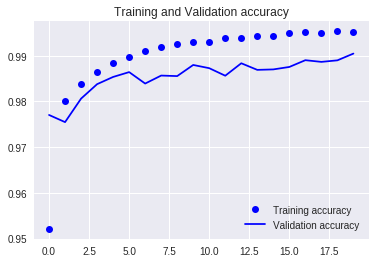

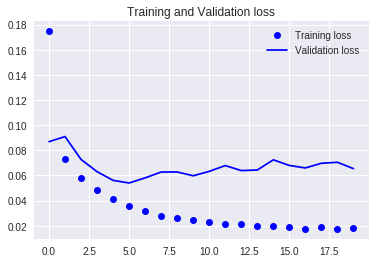

In [31]:
accuracy = lenet1_mod_train.history['acc']
val_accuracy = lenet1_mod_train.history['val_acc']
loss = lenet1_mod_train.history['loss']
val_loss = lenet1_mod_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()